In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

Using TensorFlow backend.


# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
La imagen parece un 5 y es un:  5


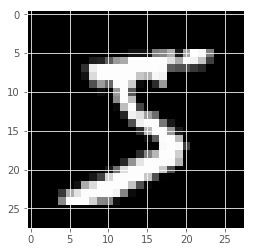

In [3]:
print(X_train.shape)
plt.imshow(X_train[0], cmap="gray")
print("La imagen parece un 5 y es un: ", y_train[0])

In [4]:
image_height, image_width = 28, 28

In [5]:
print(f"Como la imagen es 28*28 necesitamos {28*28} entradas")

Como la imagen es 28*28 necesitamos 784 entradas


In [6]:
X_train = X_train.reshape(60000, image_height * image_width)
X_test = X_test.reshape(10000, image_height * image_width)
print(X_train.shape, "ha pasado de 28,28 a 784")
print(X_test.shape)

(60000, 784) ha pasado de 28,28 a 784
(10000, 784)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train[0]
# como los colores están de 0 a 255 y los queremos de 0 a 1 vamos a dividir por 255

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
X_train /= 255

In [9]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(60000,)
(10000,)
[7 2 1 ... 4 5 6]


In [11]:
y_train = to_categorical(y_train, 10) # queremos 10 clases del 0 al 9
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(60000, 10)
(10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
model = Sequential() # linear stack of layer

In [13]:
model.add(Dense(512, activation='relu', input_shape=(784,))) # primera capa
model.add(Dense(512, activation='relu')) # segunda capa, ya sabe que el input es 512
model.add(Dense(10, activation='softmax'))  # porque queremos que nos devuelva una clase de 0 a 10

# Compilar modelo

In [14]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(f"Numero de entradas es {28*28} y lo multiplicamos por las 512 neuronas de la primera capa.\nSi les sumamos tambien el bias queda: {28*28*512+512}")

Numero de entradas es 784 y lo multiplicamos por las 512 neuronas de la primera capa.
Si les sumamos tambien el bias queda: 401920


In [17]:
print(f"Segunda capa es {512*512+512}")
print(f"Tercera: {512*10+10}")

Segunda capa es 262656
Tercera: 5130


# Entrenar modelo

In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 364us/step - loss: 0.1806 - acc: 0.9443 - val_loss: 0.6063 - val_acc: 0.9619
Epoch 2/20
60000/60000 [==============================] - 22s 368us/step - loss: 0.0800 - acc: 0.9746 - val_loss: 0.3984 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 22s 368us/step - loss: 0.0571 - acc: 0.9816 - val_loss: 0.3744 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.0420 - acc: 0.9864 - val_loss: 0.4241 - val_acc: 0.9733
Epoch 5/20
60000/60000 [==============================] - 21s 358us/step - loss: 0.0329 - acc: 0.9898 - val_loss: 0.3593 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 22s 365us/step - loss: 0.0307 - acc: 0.9899 - val_loss: 0.4101 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.0248 - acc: 0.9921 - val_loss: 0.

# Accuray

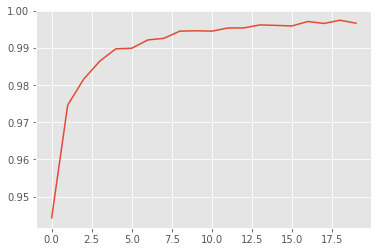

In [19]:
plt.plot(history.history['acc'])

# Accuray of training and validation with loss

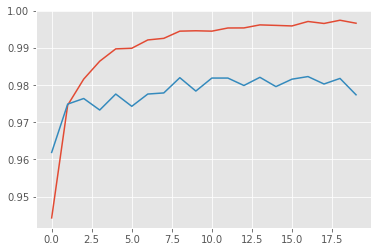

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

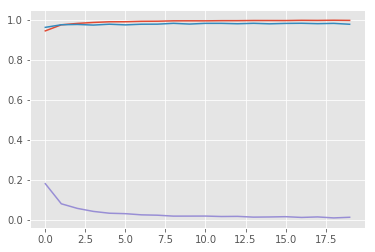

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

# Evaluating the model

In [22]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 39us/step


In [23]:
score

[0.36233596348762515, 0.9774]